In [29]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
!ls -l

total 770180
-rw-r--r-- 1 aonghus staff        72 Jun 25 11:43 Untitled.ipynb
-rw------- 1 aonghus staff 777754122 Jun 25 11:34 df_merged_ie.pkl


In [3]:
df = pd.read_pickle('df_merged_ie.pkl')

In [4]:
df.head(2)

id                                    hashedathleteid      startdatelocal  \
24  24  7f0f7b330267216fe9fa65d6f0090ad8a5a7d7491b861d... 2017-08-16 09:47:43   
89  89  5e258d3214e967a2af81b991561ebe692439244f194b18... 2017-08-19 15:12:59   

    totaldistance  startlngapprox  startlatapprox  city_name country_code  
24         7011.0           -3.24           55.94  edinburgh           gb  
89        16005.3           -6.73           52.74     tullow           ie

In [9]:
df[df.totaldistance < 1000*40]

id                                    hashedathleteid  \
24                      24  7f0f7b330267216fe9fa65d6f0090ad8a5a7d7491b861d...   
89                      89  5e258d3214e967a2af81b991561ebe692439244f194b18...   
96                      96  6828ad47cac1ff47a4edecdde8a42f9867184e4a96f96a...   
130                    130  43025210deaa0cff02a6ea41c74c8c9d1862b4ddd12732...   
137                    137  06ed8bd6e1b7347e8f672ea4bad0e89ca7dbdad62100bc...   
...                    ...                                                ...   
347200111  133642202388600  ef1dc2e316cca5b7fbf031e2e115f4fdb647516c6e3f84...   
347200138  135918535052829  7e2a687541d9aa91b7370c5529fe06b21c0575b019ce28...   
347200140  135918535052831  3dd04bded3682ed3a1f22dbd3dda3264b78d6f89b7e6ee...   
347200169  136975097005269  808c961aeea6266cabc57b9d2d5b5777b75929b0ac72da...   
347200177  136975097005277  578b02058c6123209c8b18d0408e071d6a55d62033c89f...   

               startdatelocal  totaldistance  startlngapprox  startlatapprox  \
24        2017-08-16 09:47:43         7011.0           -3.24           55.94   
89        2017-08-19 15:12:59        16005.3           -6.73           52.74   
96        2017-08-19 17:29:17        10041.3            2.30           48.86   
130       2017-08-19 08:19:28        27411.0         -123.10           49.25   
137       2017-08-19 18:13:25        16008.5           -3.17           55.94   
...                       ...            ...             ...             ...   
347200111 2017-05-15 19:04:37         1393.0           -9.50           52.63   
347200138 2017-03-12 11:33:59         8036.1           -2.25           53.43   
347200140 2017-03-12 09:06:53        26564.5           -0.44           53.75   
347200169 2016-10-13 13:04:04         4290.8           -8.50           54.36   
347200177 2016-10-13 08:18:12         3252.4          -97.39           32.83   

           city_name country_code  
24         edinburgh           gb  
89            tullow           ie  
96             paris           fr  
130        vancouver           ca  
137        edinburgh           gb  
...              ...          ...  
347200111    kilrush           ie  
347200138       sale           gb  
347200140   beverley           gb  
347200169      sligo           ie  
347200177    saginaw           us  

[12158424 rows x 8 columns]

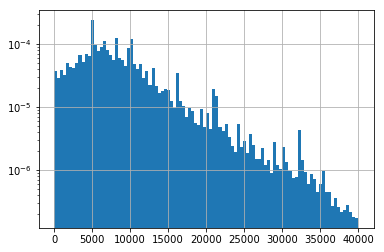

In [12]:
df[df.totaldistance < 40000].totaldistance.hist(bins=100, density=True)
plt.yscale('log')

In [14]:
df[df.totaldistance < 40000].totaldistance.mean()

8282.039543264915

In [16]:
activity_counts = df.groupby('hashedathleteid').agg('count')['totaldistance']

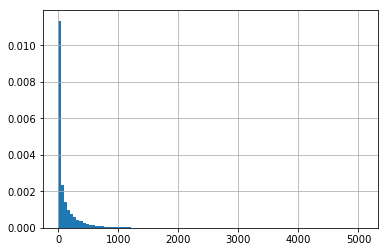

In [21]:
activity_counts.hist(bins=100, density=True)
#plt.yscale('log')

In [39]:
activity_counts.sort_values().tail(2000)

hashedathleteid
0d53733f14d9320e32e87352c66efcc12e5da36264f693aa069362b6df45c82f     817
62a5495b394810bccac079a440ad7fa7fdfec59619f02b9139e9f6f5325d0cb3     817
cc9222628c69ea3ce39f84ae1ea9d0ba1550b285b9648c8ef4a5347dec3f05ed     817
0176e8b7f6922adf53a32bfbc71d48bd76b6c46a00674052ea130277dac9dc62     818
1a4f89a98908640cd61bc0e04071b0239a207a84451174d6f242577a253e873a     818
                                                                    ... 
f9f2184cab4cf0e49a4821eb01963335d812325e33e5f76cc91c75b2fdd22bd3    3433
9db84ebbd102fcc3f9d3bb992fceb17ef2f8c15cba24c507613c537044f899bb    3619
d7228f9f79bfce5e453d09ea0ad5467aa0c32f421fa99323fe70638eb231a9ac    3768
a0c443419589351929ebc341c7275db22944cb0e931e13fc9ee8a735478fa594    3861
b0dccb874764182bd08b703b06383285d6425d071a321001a0230b835cd26cdb    5068
Name: totaldistance, Length: 2000, dtype: int64

In [40]:
test_athlete = df[df.hashedathleteid == '0d53733f14d9320e32e87352c66efcc12e5da36264f693aa069362b6df45c82f']

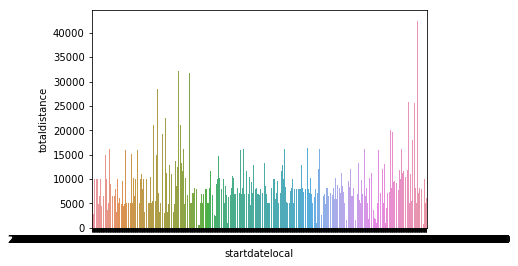

In [41]:
sns.barplot(x=test_athlete.startdatelocal, y=test_athlete.totaldistance)